* Brian O'Connell
* <span style="background-color:#33FFF5">brr99@pitt.edu</span> 
---

# Exercise-1

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
# visualization and tuning the aesthetics
import sys
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (6, 5))

In [3]:
WB = pd.read_csv('WorldBank_Assignment3_Data.csv')

In [4]:
WB.describe()

,2015 [YR2015]
count,132.000000
mean,23208.978659
std,96054.088925
min,0.000000
25%,19.993992
50%,40.555518
75%,95.468750
max,847460.000000


In [5]:
WB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   134 non-null    object 
 1   Country Code   132 non-null    object 
 2   Series Name    132 non-null    object 
 3   Series Code    132 non-null    object 
 4   2015 [YR2015]  132 non-null    float64
dtypes: float64(1), object(4)
memory usage: 5.5+ KB


As seen from above the dataset was downloaded and has the year as a column and all of the variables are in  the seires name coulumn, I need to convert to long format and did this by using the pivot_table function to organize the variables.

In [6]:
WB.pivot = WB.pivot_table(index='Country Name', 
                         columns='Series Name', 
                         values='2015 [YR2015]')
WB.pivot



Series Name,Alternative and nuclear energy (% of total energy use),"Electricity production from oil, gas and coal sources (% of total)",Forest area (% of land area),Proportion of seats held by women in national parliaments (%),Total greenhouse gas emissions (kt of CO2 equivalent),Women Business and the Law Index Score (scale 1-100)
Country Name,,,,,,
Austria,12.212879,22.222042,47.033325,30.601093,75480.0,94.375
Belgium,15.110327,39.214643,22.764201,39.333333,111520.0,100.000
Bulgaria,0.000000,50.404169,35.307664,20.416667,57310.0,90.625
Croatia,0.000000,33.173162,33.963598,15.231788,22690.0,93.750
Cyprus,0.000000,91.219943,18.691558,12.500000,8140.0,88.750
Czech Republic,18.956573,55.915319,34.560161,20.000000,122290.0,91.250
Denmark,11.748946,31.899679,15.617000,37.430168,46610.0,100.000
Estonia,0.933237,7.151771,55.693812,23.762376,18110.0,91.250
Finland,25.351314,16.185839,73.735645,41.500000,53550.0,97.500


Upon inspecting the data the only missing data was in Bulgaria, Croatia, and Cyprus for the % alternative energy use variable and this is because they were not using any of these methods for electricity production so these countries were given values of 0 for that variable.

In [7]:
WB.pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Austria to Sweden
Data columns (total 6 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Alternative and nuclear energy (% of total energy use)              22 non-null     float64
 1   Electricity production from oil, gas and coal sources (% of total)  22 non-null     float64
 2   Forest area (% of land area)                                        22 non-null     float64
 3   Proportion of seats held by women in national parliaments (%)       22 non-null     float64
 4   Total greenhouse gas emissions (kt of CO2 equivalent)               22 non-null     float64
 5   Women Business and the Law Index Score (scale 1-100)                22 non-null     float64
dtypes: float64(6)
memory usage: 1.2+ KB


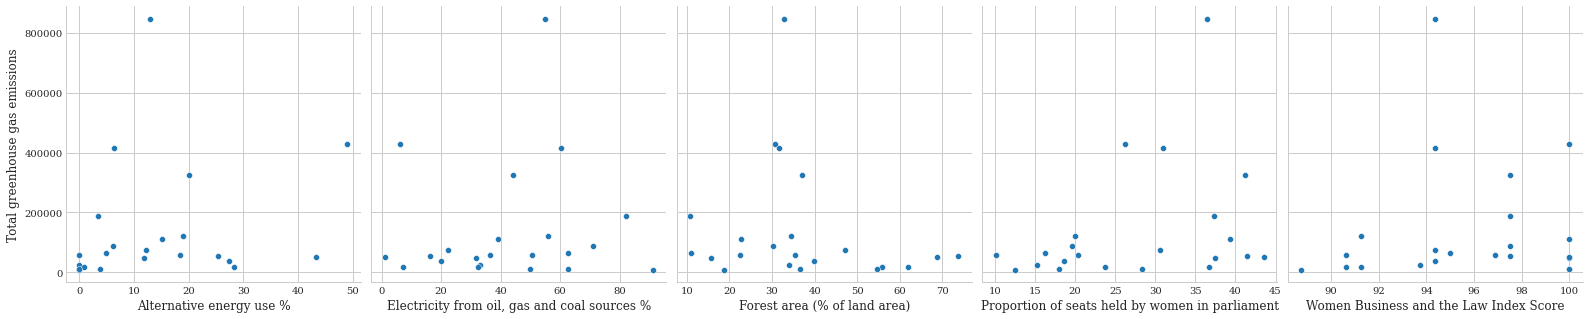

In [14]:
WB.pivot.rename(columns = {'Alternative and nuclear energy (% of total energy use)':'Alternative energy use %','Electricity production from oil, gas and coal sources (% of total)':'Electricity from oil, gas and coal sources %' ,'Proportion of seats held by women in national parliaments (%)':'Proportion of seats held by women in parliament', 'Total greenhouse gas emissions (kt of CO2 equivalent)':'Total greenhouse gas emissions', 'Women Business and the Law Index Score (scale 1-100)':'Women Business and the Law Index Score'}, inplace = True)

x_var= ['Alternative energy use %', 'Electricity from oil, gas and coal sources %', 'Forest area (% of land area)','Proportion of seats held by women in parliament','Women Business and the Law Index Score']
sns.pairplot(data=WB.pivot, y_vars=['Total greenhouse gas emissions'], x_vars=x_var, height=4.5)

The high total greenhouse gas emissions in each of the graphs is Germany, this is potentially an issue since all of the other countries are clustered much lower comparitively. This is likely due to the population difference between Germany and these other countries.

In [11]:
WB.pivot.corr()

Series Name,Alternative energy use %,"Electricity from oil, gas and coal sources %",Forest area (% of land area),Proportion of seats held by women in parliament,Total greenhouse gas emissions,Women Business and the Law Index Score
Series Name,,,,,,
Alternative energy use %,1.000000,-0.645341,0.373138,0.398327,0.193812,0.313972
"Electricity from oil, gas and coal sources %",-0.645341,1.000000,-0.617964,-0.285233,0.089903,-0.222031
Forest area (% of land area),0.373138,-0.617964,1.000000,0.328934,-0.178109,-0.017550
Proportion of seats held by women in parliament,0.398327,-0.285233,0.328934,1.000000,0.313395,0.399063
Total greenhouse gas emissions,0.193812,0.089903,-0.178109,0.313395,1.000000,0.070769
Women Business and the Law Index Score,0.313972,-0.222031,-0.017550,0.399063,0.070769,1.000000


<AxesSubplot:xlabel='Series Name', ylabel='Series Name'>

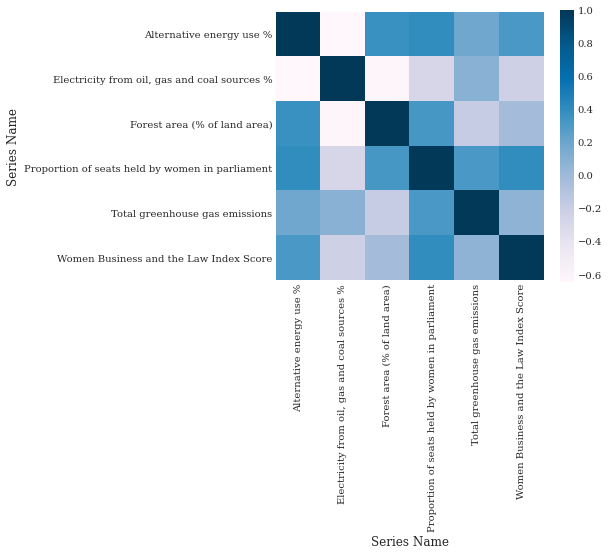

In [12]:
corrmat = WB.pivot.corr()
sns.heatmap(corrmat, square = True, cmap="PuBu")

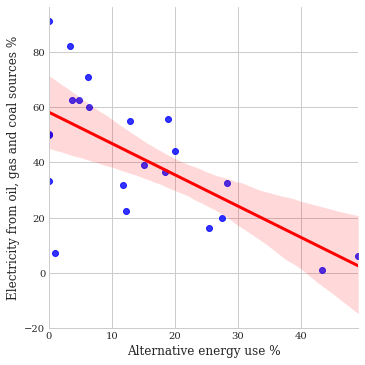

In [15]:
sns.lmplot(x="Alternative energy use %", y="Electricity from oil, gas and coal sources %", data=WB.pivot, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})

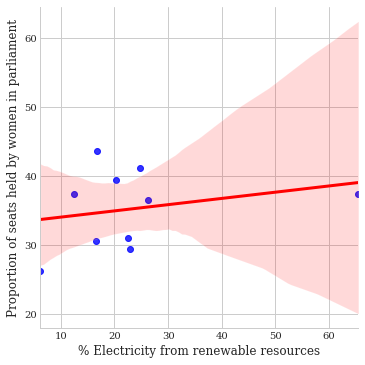

In [72]:
sns.lmplot(x="% Electricity from renewable resources", y="Proportion of seats held by women in parliament", data=WB.pivot, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})

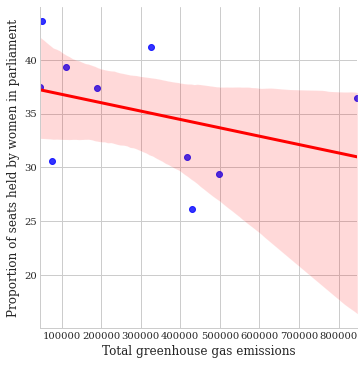

In [71]:
sns.lmplot(x="Total greenhouse gas emissions", y="Proportion of seats held by women in parliament", data=WB.pivot, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})

The exploration of the data is listed above, I am interested in exploring the relationship of the proportion of females in parliment with some environmental factors and what the relationship between these variables is. There seem to be some associations here but it looks like there could be some outliers. Also more data may be needed to really get a picture of this relationship.